In [0]:
import os
os.cpu_count()

2

In [1]:
import os
import cv2
import keras
import pickle
import random
import numpy as np
import pandas as pd
#from PIL import Image
from PIL import Image 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from keras import backend as K
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
#from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, EarlyStopping 
from keras.models import Sequential,load_model 
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("____ok")

Using TensorFlow backend.


____ok


In [0]:
train_dir = '/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/train/'
valid_dir = '/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/validation/'
test_dirr='/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/test/'
class_names=["Handgun", "Knife","Rifle"]
training_samples = 855 
validation_samples = 50  #i dont have just 50img in validation i must change this to 60 and try to fit the model agin

**Data Generator**

In [4]:
batch_size = 32
# augmentation configuration for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        rotation_range=45,
        horizontal_flip=True)

#  augmentation configuration  for testing:
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  
        batch_size=batch_size,
        classes=class_names,
         class_mode='categorical')  

#i wll try it by the train-datgen 'zoom and range and ...'
validation_generator = train_datagen .flow_from_directory(
        valid_dir,
        target_size=(64, 64),  
        batch_size=15,
       classes=class_names,
       class_mode='categorical')  #because i have mor then 2 classes 'binary clasifacation'
test_generator=test_datagen.flow_from_directory(    
        test_dirr,
        target_size=(64, 64), 
        classes=class_names,
       batch_size=10)

Found 855 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [5]:
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()
print(X_train.shape)
print(y_test.shape)

(32, 64, 64, 3)
(10, 3)


**3AWED HAWS 3la scater treaa train w test !!!**

In [0]:
plt.scatter(X_train, y_train, c='blue', label='Train set')
plt.scatter(X_test, y_test, c='red', label='Test set')
plt.legend()

In [0]:
input_shape=(64,64,3)

**Builld The Cnn Model architector**

***I'm gone to builed My model here
"Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output"
By taking  feature maps creating from the original data,






***Pooling is down-sampling, most often in the form of "max-pooling," where we select a region, and then take the maximum value in that region, and that becomes the new value for the entire region. Fully Connected Layers are typical neural networks, where all nodes are "fully connected." The convolutional layers are not fully connected like a traditional neural network


**The karnel_size** 
 kernel size = n_inputs * n_outputs
 ![alt text](https://images.ctfassets.net/be04ylp8y0qc/4CZKbDvPaWKbxO00WX3elB/a4a51727768b2948e42377582ba4df3d/kernel3.png?fm=webp)

**The Droupout  "dropping out" is a technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.**

**Stride** is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on.

 **‘Flatten’** layer. it transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

In [0]:
model = Sequential()  

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(100,  activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(50,  activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(3, activation='softmax'))#num_classes in the output

**Show information about My Model architector**

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 4, 4, 16)         

**Show the Mdel Diagrame**
and save the diagrame

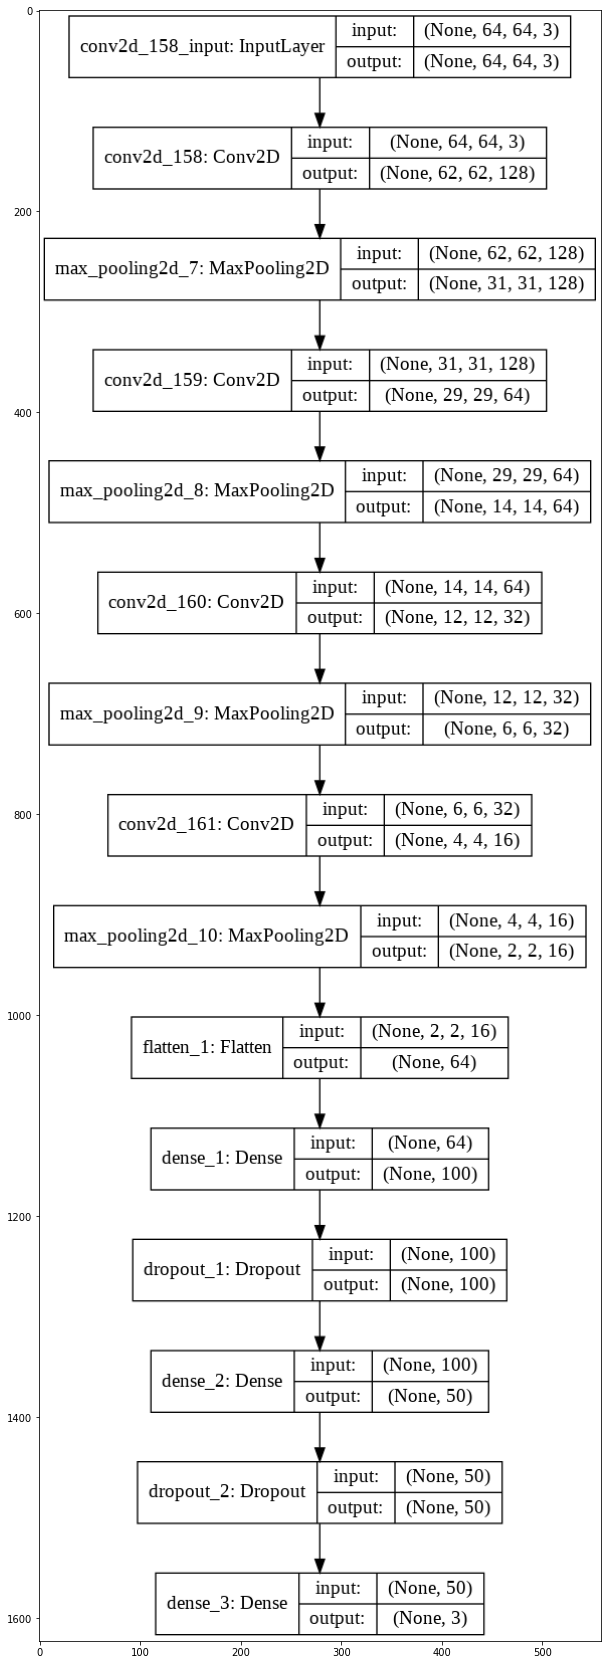

In [0]:
from keras.utils import plot_model
import matplotlib.image as mpimg
model_diag='/content/drive/My Drive/Colab Notebooks/WeaponProject/'

plot_model(model, to_file=model_diag+'model_dig.png',
           show_shapes=True,
           show_layer_names=True)

img=mpimg.imread(model_diag+'model_dig.png')
plt.figure(figsize=(60,30))
implt=plt.imshow(img)

**Compile The Model**

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Creating checkpoit model**
to save loss and acc after each epoch

In [0]:
checkpoint=ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/WeaponProject",
                           monitor="val_loss",
                           mode="main ",
                           save_best_only=True,
                           verbose=1
)

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode main  is unknown, fallback to auto mode.
  RuntimeWarning)


**This fct To stop trining when we got the best rslts during the training**
the goal of this is to to mim the risque of** ouver fiting**

In [0]:
stop=EarlyStopping(  monitor="val_loss",
                  min_delta=0,
                  patience=2,   #nbr of epochs we wait befor stoping
                  verbose=1,
                  restore_best_weights=True #keep the best weights once stopped
                  )

**Fit The Model**

In [0]:
callbacks=[checkpoint]
history=model.fit_generator(
    train_generator,
    steps_per_epoch=training_samples // batch_size,
    epochs=25,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/25
26/26 [==============================] - 405s 16s/step - loss: 1.1002 - accuracy: 0.3499 - val_loss: 1.1055 - val_accuracy: 0.2812
Epoch 2/25
26/26 [==============================] - 41s 2s/step - loss: 1.1004 - accuracy: 0.3402 - val_loss: 1.0897 - val_accuracy: 0.3929
Epoch 3/25
26/26 [==============================] - 32s 1s/step - loss: 1.0993 - accuracy: 0.3366 - val_loss: 1.0953 - val_accuracy: 0.3750
Epoch 4/25
26/26 [==============================] - 30s 1s/step - loss: 1.0991 - accuracy: 0.3524 - val_loss: 1.0958 - val_accuracy: 0.3571
Epoch 5/25
26/26 [==============================] - 31s 1s/step - loss: 1.0985 - accuracy: 0.3317 - val_loss: 1.0964 - val_accuracy: 0.4062
Epoch 6/25
26/26 [==============================] - 28s 1s/step - loss: 1.0964 - accuracy: 0.3670 - val_loss: 1.0932 - val_accuracy: 0.5000
Epoch 7/25
26/26 [==============================] - 29s 1s/step - loss: 1.0978 - accuracy: 0.3402 - val_loss: 1.0941 - val_accuracy: 0.5000
Epoch 8/25
26/26 [

**Save The Model**

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/WeaponProject/Weapon_model.h5')

**another why to save My model as Jason File**

In [0]:
jason=model.to_json()
jason

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_158", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 128, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_7", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_159", "trainable":

**to save the wieghts**

In [0]:
model.save_weights("/content/drive/My Drive/Colab Notebooks/WeaponProject/Weapon_model_wieghts.h5")

**To save the history fiele after the trainig**

In [0]:
pickle_out=open("/content/drive/My Drive/Colab Notebooks/WeaponProject/ChottModel.pickle","wb")
pickle.dump(history.history,pickle_out)
pickle_out.close()

**Loade the saving history from the pickle file**

In [0]:
pickle_in=open("/content/drive/My Drive/Colab Notebooks/WeaponProject/ChottModel.pickle","rb")
saved_history=pickle.load(pickle_in)
print("this is my saved History of training".format(saved_history))

this is my saved History of training





**Evaluate The performence of my Modle**

In [0]:
print("Evaluate on test data")
score=model.evaluate(X_test, y_test , verbose=1)
print("test loss, test acc:", score)
#print("Test loss____", score[0])
#print("Test accurcy____",score[1])

Evaluate on test data
32/32 [==============================] - 0s 5ms/step
test loss, test acc: [1.0890194177627563, 0.4375]


**predictions with new Data**

In [0]:
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

**PloTiing The resalts**

2 meth


In [0]:
from matplotlib import plot_model
plot_model(history)

Test loss of CNN: 1.0890194177627563 / Test accuracy: 0.4375


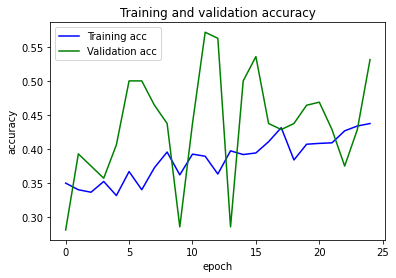

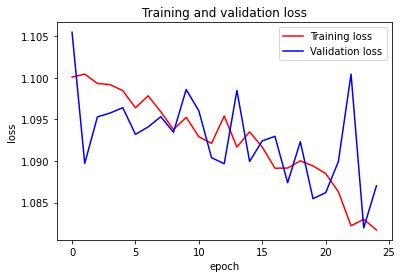

In [0]:
print(f'Test loss of CNN: {score[0]} / Test accuracy: {score[1]}')
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

**1-load saved Model**

In [6]:
#loss_and_metrics=model.evaluate(X_test,y_test,batch_size=128)
weapon_model=load_model('/content/drive/My Drive/Colab Notebooks/WeaponProject/Weapon_model.h5')
weapon_model.get_weights()
weapon_model.optimizer

**2-load json model**

In [0]:
from keras.models import model_from_json
weapon_json=model_from_json(jason)
#weapon_json.summary()

**Predection**

**1-with fct evaluate**
"the classification metrics "

In [7]:
mAP=weapon_model.evaluate(X_test,y_test)
print("Train and test mAP:",mAP)

10/10 [==============================] - 0s 34ms/step
Train and test mAP: [1.0988410711288452, 0.4000000059604645]


**2-model.predect**
" confusion matrix"

**Confusion Matrics**

In [8]:
y_pred=weapon_model.predict_classes( X_test)
print(classification_report(np.argmax(y_test,axis=1), y_pred))


              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.00      0.00      0.00         0
           2       0.67      0.40      0.50         5

    accuracy                           0.40        10
   macro avg       0.39      0.27      0.31        10
weighted avg       0.58      0.40      0.47        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**moy pression=0.57**
**moy recall=0.51**

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

[[2 2 1]
 [0 0 0]
 [2 1 2]]


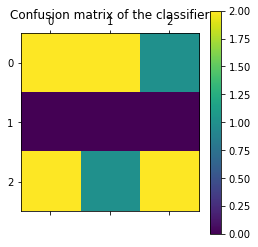

In [10]:
import pylab as pl
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

**Show mis-classifications**

In [0]:
correct , lables_pred=weapon_model.predict_classes(X_test,y_test)

**` Testing on images`**

In [0]:
print("Generate predictions for 3 samples")
predictions = weapon_model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

In [0]:
print(np.argmax(predictions[2]))

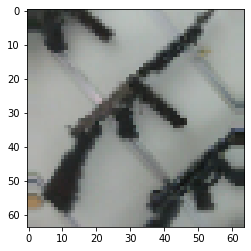

In [0]:
plt.imshow(X_test[2])
plt.show()

In [0]:
test_images,test_labels=test_generator.next()
test_labels=test_labels[:,0]
test_labels

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
filenames = test_generator.filenames
nb_samples = len(filenames)
print("we have {} images for The test".format(nb_samples))

we have 80 images for The test


In [0]:
predict = weapon_model.predict_generator(test_images,steps=1,verbose=0)
predict

In [0]:
cfm=confusion_matrix( np.argmax(test_labels),predict[:,0])

3972


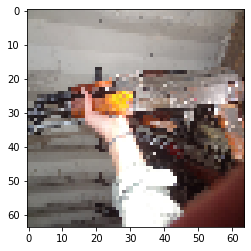

In [0]:
print(np.argmax(predict[0]))
plt.imshow(test_images[2],cmap=plt.cm.binary)
plt.show()

Test1

In [0]:
from google.colab.patches import cv2_imshow
img_r ,img_h,img_depth = 64,64,3
color=True
scale=64

In [0]:
def test_Model(name, res, input_im,scale, img_r , img_h):
  #BLACK=[0,0,0]
  res=int(res)
  if res==0:
    pred="Handgun"
  if res==1:
    pred="Knife"
  if res==2:
    pred="Rifle"


  exp_img=cv2.copyMakeBorder(input_im, 0,0,0 , imageL.shape[0]*2 ,cv2.BORDER_CONSTANT)
  if color==False:
     exp_img=cv2.cvtColor(exp_im , cv2.COLOR_BAYER_BG2BGR_VNG)
  cv2.putText(exp_img , str(pred) , (300, 80)  , cv2.FONT_ITALIC ,3 ,  (0,255,0) ,2)
  exp_img.resize(255,360)
  print(type(exp_img))
  plt.imshow(exp_img)

In [0]:
#rand=np.random.randint(0 ,len(X_test))
input_im= "/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/tst/3bf93688cb550b7f.jpg"
im = Image.open( input_im)
imageL =im.resize((64,64))
#imageL=cv2.resize(input_im ,fx=scale, fy=scale)
imageL = np.array(imageL)
imr=imageL.reshape(1,img_r,  img_h, img_depth)

<class 'numpy.ndarray'>


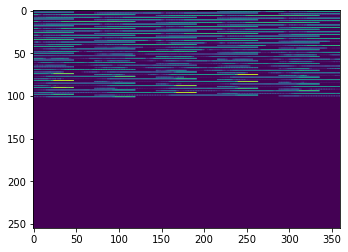

In [0]:
 #pridection
res=str(weapon_model.predict_classes(imr, 1 , verbose=0)[0])
test_Model("Prediction", res,  imageL, scale ,  img_r, img_h)
cv2.waitKey(0)  

cv2.destroyAllWindows()

**Testttt**

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [0]:
x=[]
m,n = 64,64
weapon_model=load_model('/content/drive/My Drive/Colab Notebooks/WeaponProject/Weapon_model.h5')
path = '/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/tst/'
files=os.listdir(path)

In [0]:
x=[]
for i in files:
    im = Image.open(path + i)
    imrs = im.resize((m,n))
    imrs=img_to_array(imrs)/255
    imrs=imrs.transpose(2,0,1)
    imrs=imrs.reshape(m,n,3)
    x.append(imrs)
x=np.array(x)
predictions = weapon_model.predict(x)
print (predictions)

[[0.33520892 0.31961653 0.34517455]
 [0.33356026 0.32396996 0.34246978]
 [0.3363864  0.3193999  0.34421378]]


summarize filter shapes

In [0]:
for layer in weapon_model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue

get filter weights

In [0]:
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_3 (50, 3)


In [0]:
filters, biases = weapon_model.layers[0].get_weights()

In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

 plot first few filters

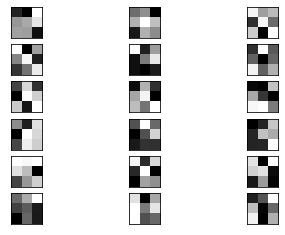

In [0]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

**Testt**

In [0]:
predictions = weapon_model.predict(test_images)

array([0.34717286, 0.3176708 , 0.33515635], dtype=float32)

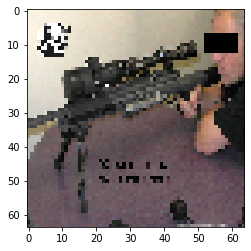

In [0]:
plt.imshow(test_images[4])
predictions[4]


In [0]:
np.argmax(predictions[0])

1

In [0]:
int(test_labels[0])

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

TypeError: ignored

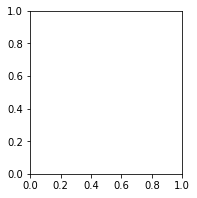

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, np.argmax(predictions[i]),int(test_labels) , test_image[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,np.argmax(predictions[i]), int(test_labels), test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, np.argmax(predictions[i]),int(test_labels))
plt.tight_layout()
plt.show()

Test2

(-0.5, 1023.5, 679.5, -0.5)

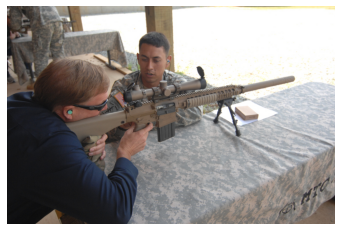

In [14]:
image= plt.imread( "/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/test/Rifle/0b19b57b99ea7d55.jpg")
image1=img_to_array(image)
plt.imshow(image)
plt.axis("off")

In [0]:
pickle_in=open("/content/drive/My Drive/Colab Notebooks/WeaponProject/ChottModel.pickle","rb")
model=pickle.load(pickle_in)

In [0]:
def preprocessing(img):
    h= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h=cv2.equalizeHist(h)
    #normalisation d'un image
    h=h/255
    return h

In [17]:
from keras.preprocessing import image
#print(image.shape)
img=cv2.resize(image1,(64,64))
image=preprocessing(img)
image=image.reshape(-1,64,64)
predClass=int(weapon_model.predict_classes(image))
prediction=model.predict(image)
maxpred=np.amax(prediction)
print(predClass,maxpred)
plt.imshow(image)

error: ignored

Test3

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import time
def read_image(file_path):
   print("[INFO] loading and preprocessing image…") 
   image = load_img(file_path, target_size=(64, 64)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image

In [0]:
def test_single_image(path):
     weapon =["Handgun", "Knife","Rifle"]
     images = read_image(path)
     time.sleep(.5)
     bt_prediction =weapon_model.predict(images) #_classes
     preds = weapon_model.predict_proba(bt_prediction)
     
     for idx, weap, x in zip(range(0,3), weapon , preds[0]):
            print("ID: {}, Label: {} {}%".format(idx, weap, round(x*100,2) ))
            print('Final Decision:')
            time.sleep(.5)
     for x in range(3):
           print('.'*(x+1))
           time.sleep(.2)
     class_predicted = model.predict_classes(bt_prediction)
     class_dictionary = generator_top.class_indices 
     inv_map = {v: k for k, v in class_dictionary.items()} 
     print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 

     return load_img(path)


In [22]:
file_path="/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/test/Rifle/0b19b57b99ea7d55.jpg"
test_single_image(file_path)

[INFO] loading and preprocessing image…


ValueError: ignored